## Base SICR Model

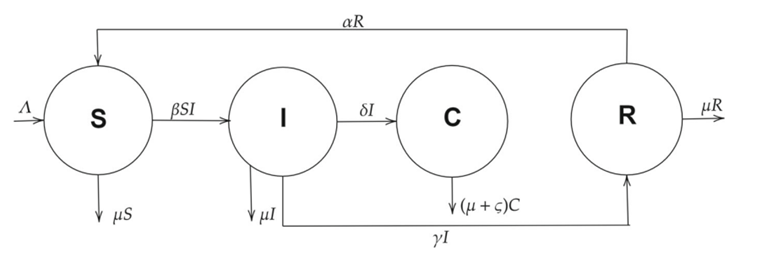

Code to get R values from base model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from ipywidgets import interactive, FloatSlider

def ode_model2(x, t, alpha, u, eet, b, delt, gam, a):
    S, I, C, R = x
    n = S + I + C + R
    dSdt = alpha - b * S * I/n  - u * S + a * R
    dIdt = b * S * I/n  - (delt + gam + u) * I
    dCdt = delt * I - (eet + u) * C
    dRdt = gam * I - (a + u) * R
    return [dSdt, dIdt, dCdt, dRdt]

def plot_simulation(alpha, u, eet, b, delt, gam, a):
    x0 = [422.00000, 29.820000, 0.099100, 0]
    t = np.linspace(0, 100, 101)

    # Solve ODEs
    x = odeint(ode_model2, x0, t, args=(alpha, u, eet, b, delt, gam, a))
    S = x[:, 0]
    I = x[:, 1]
    C = x[:, 2]
    R = x[:, 3]

    # Plot results
    plt.figure(figsize=(10, 6))

    plt.subplot(2, 2, 1)
    plt.plot(t, S)
    plt.title('Susceptible (S)')
    plt.xlabel('Time')
    plt.ylabel('Population')

    plt.subplot(2, 2, 2)
    plt.plot(t, I)
    plt.title('Infected (I)')
    plt.xlabel('Time')
    plt.ylabel('Population')

    plt.subplot(2, 2, 3)
    plt.plot(t, C)
    plt.title('Cancer (C)')
    plt.xlabel('Time')
    plt.ylabel('Population')

    plt.subplot(2, 2, 4)
    plt.plot(t, R)
    plt.title('Recovered (R)')
    plt.xlabel('Time')
    plt.ylabel('Population')

    plt.tight_layout()
    plt.show()

    # Return time and R values
    return t, R

# Define sliders
alpha_slider = FloatSlider(value=9.016228, min=0, max=20, step=0.1, description='alpha')
u_slider = FloatSlider(value=0.014156, min=0, max=0.1, step=0.001, description='u')
eet_slider = FloatSlider(value=0.108696, min=0, max=1, step=0.01, description='eet')
b_slider = FloatSlider(value=0.556, min=0, max=1, step=0.01, description='b')
delt_slider = FloatSlider(value=0.05714, min=0, max=1, step=0.01, description='delt')
gam_slider = FloatSlider(value=0.5, min=0, max=1, step=0.01, description='gam')
a_slider = FloatSlider(value=0.2, min=0, max=1, step=0.01, description='a')

# Create interactive widget
interactive_plot = interactive(
    plot_simulation,
    alpha=alpha_slider,
    u=u_slider,
    eet=eet_slider,
    b=b_slider,
    delt=delt_slider,
    gam=gam_slider,
    a=a_slider
)

# Display the interactive widget
interactive_plot

interactive(children=(FloatSlider(value=9.016228, description='alpha', max=20.0), FloatSlider(value=0.014156, …

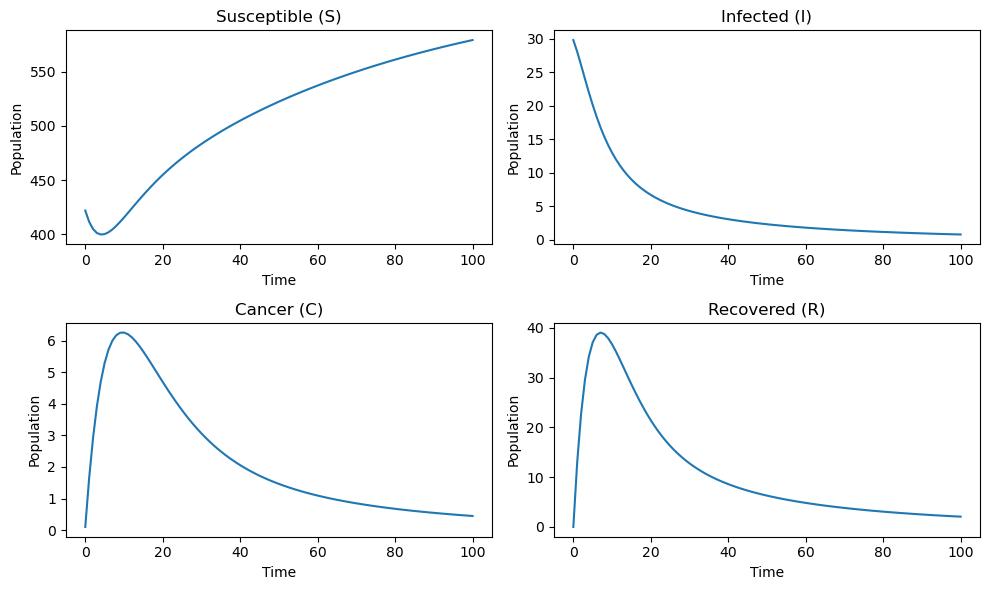

In [2]:
t_values, r_req = plot_simulation(alpha=9.016228, u=0.014156, eet=0.108696, b=0.556, delt=0.05714, gam=0.5, a=0.2)

In [3]:
r_req

array([ 0.        , 13.0276786 , 22.6953612 , 29.58539019, 34.23099097,
       37.10279095, 38.60336944, 39.06811715, 38.77021951, 37.92784936,
       36.71215666, 35.25513898, 33.65686959, 31.99183955, 30.31434359,
       28.66294643, 27.06411832, 25.53515005, 24.08646104, 22.72340664,
       21.44767896, 20.25838199, 19.15284828, 18.12725264, 17.17706797,
       16.29739868, 15.48322055, 14.72954928, 14.03155533, 13.38463851,
       12.78447311, 12.22703142, 11.70859183, 11.22573615, 10.77533964,
       10.35455639,  9.96080183,  9.59173385,  9.24523348,  8.91938576,
        8.61246134,  8.32289903,  8.04928955,  7.79036041,  7.54496216,
        7.31205579,  7.09070131,  6.88004749,  6.6793226 ,  6.48782615,
        6.30492145,  6.13002897,  5.96262042,  5.80221354,  5.64836733,
        5.50067793,  5.35877485,  5.22231769,  5.09099315,  4.96451248,
        4.8426091 ,  4.72503645,  4.61156617,  4.50198642,  4.39610045,
        4.29372515,  4.19468996,  4.0988357 ,  4.00601368,  3.91

## Updated Compartmental Model

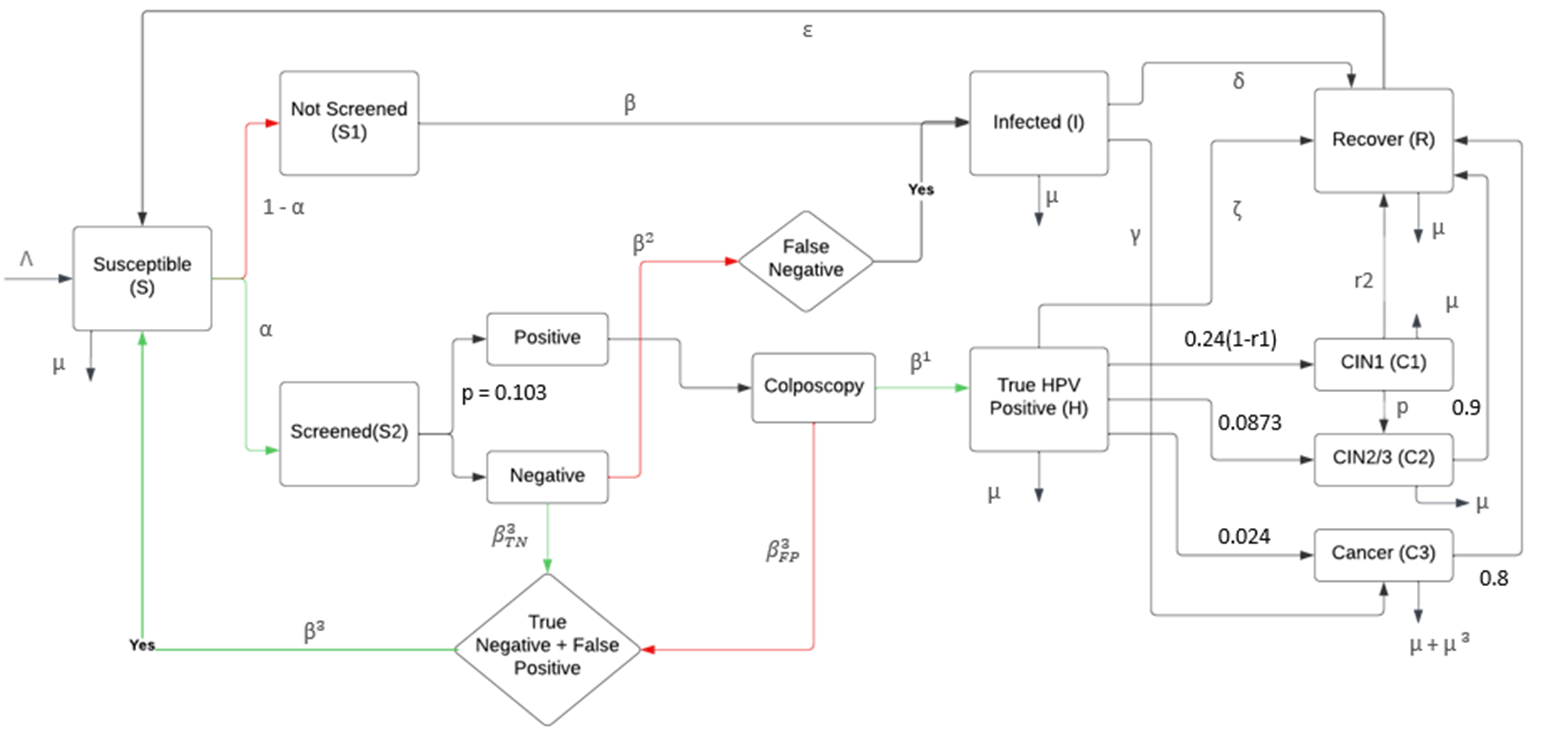

Importing required Libraries

In [4]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import minimize

Defining our Compartmental Model

In [5]:
def model(x, t, Lambda, a, b, b1, b2, b3t, b3f, delt, u, u3, gam, e, r1, r2, p,n, tel):
    S, S1, S2, I, C, N, H, C1, C2, C3, R = x
    no = S + I + H + C1+ C2 + C3 + R
    dSdt = Lambda + e * R - S + b3t * N + b3f * C - u*S
    dS1dt = (1 - a) * S - b*S1*I/no
    dS2dt = a * S - S2
    dIdt = b *S1*I/no + b2 * N - (delt + u + gam) * I
    dCdt = 0.103 * S2 - (b1 + b3f) * C
    dNdt = 0.897 * S2 - (b2 + b3t) * N
    dHdt = b1 * C - (0.24 * (1 - r1) + 0.0873 + 0.024 + tel + u) * H
    dC1dt = 0.24 * (1 - r1) * H - (r2 + p + u) * C1
    dC2dt = 0.0873 * H + p * C1 - 0.9 * C2 - u * C2
    dC3dt = 0.024 * H - 0.8 * C3 - (u + u3) * C3 + gam*I
    dRdt = delt * I + tel * R + r2 * C1 + 0.62 * C2 + 0.8 * C3 - (e + u) * R
    return [dSdt, dS1dt, dS2dt, dIdt, dCdt, dNdt, dHdt, dC1dt, dC2dt, dC3dt, dRdt]

Required R values

In [6]:
observed_R = np.array(r_req)

Objective function (least squares)

In [7]:
def objective_function(params, *args):
    # Unpack the parameters
    Lambda, a, b, b1, b2, b3t, b3f, delt, u, u3, gam, e, r1, r2, p,n, tel = params

    # Unpack the arguments
    t, initial_conditions = args

    # Solve the ODEs with current parameters
    sol = odeint(model, initial_conditions, t, args=(Lambda, a, b, b1, b2, b3t, b3f, delt, u, u3, gam, e, r1, r2, p,n, tel))

    # Calculate the difference between model predictions and observed data
    residuals = sol[:, 10] - observed_R

    # Print intermediate results for debugging
    print("Params:", params)
    print("Residuals:", residuals)

    # Return the sum of squared residuals
    return np.sum(residuals**2)

In [8]:
# Initial guess for parameters
initial_params = np.array([9.01623, 0.7, 0.556, 0.4, 0.013, 0.987, 0.6, 0.5, 0.014156, 0.108696, 0.485844, 0.2, 0.13, 0.77, 0.065, 0.485844, 0.68])

In [9]:
# Initial conditions
initial_conditions = [422.00000, 0, 0, 29.820000, 0, 0, 0, 0.059460, 0.024775, 0.014865, 0]

In [10]:
# Time points
t = np.arange(0, len(observed_R))

In [11]:
# Parameter estimation
result = minimize(objective_function, initial_params, args=(t, initial_conditions), method='L-BFGS-B')

Params: [9.01623  0.7      0.556    0.4      0.013    0.987    0.6      0.5
 0.014156 0.108696 0.485844 0.2      0.13     0.77     0.065    0.485844
 0.68    ]
Residuals: [0.00000000e+00 3.65005277e+00 1.57028979e+01 4.02872642e+01
 8.38525711e+01 1.56477118e+02 2.74300322e+02 4.63260001e+02
 7.64936175e+02 1.24581193e+03 2.01202927e+03 3.23292551e+03
 5.17856986e+03 8.27961745e+03 1.32227431e+04 2.11027994e+04
 3.36654163e+04 5.36937947e+04 8.56254026e+04 1.36535216e+05
 2.17703372e+05 3.47114593e+05 5.53443170e+05 8.82406561e+05
 1.40689531e+06 2.24312393e+06 3.57638140e+06 5.70208694e+06
 9.09124816e+06 1.44948256e+07 2.31101286e+07 3.68461112e+07
 5.87463533e+07 9.36634483e+07 1.49334227e+08 2.38094060e+08
 3.79610099e+08 6.05239065e+08 9.64975191e+08 1.53852778e+09
 2.45298298e+09 3.91096314e+09 6.23552339e+09 9.94173322e+09
 1.58508041e+10 2.52720510e+10 4.02930072e+10 6.42419735e+10
 1.02425494e+11 1.63304164e+11 2.60367306e+11 4.15121897e+11
 6.61858015e+11 1.05524675e+12 1.682

C:\Users\Vishnu\anaconda3\Lib\site-packages\scipy\integrate\_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


Params: [ 9.01841772  0.70153403  0.55456835  0.39940078 -0.02482635  0.98756224
  0.60024051  0.49738404  0.59780155  0.11018421  0.48640608  0.77414909
  0.13019965  0.76987029  0.06504792  0.485844    0.10705977]
Residuals: [ 0.00000000e+00 -7.94847126e+00 -1.94035920e+01 -2.81029119e+01
 -3.38689088e+01 -3.76150966e+01 -4.09688277e+01  4.63260029e+02
  7.64936228e+02  1.24581202e+03  2.01202945e+03  3.23292582e+03
  5.17857041e+03  8.27961841e+03  1.32227447e+04  2.11028023e+04
  3.36654212e+04  5.36938031e+04  8.56254168e+04  1.36535240e+05
  2.17703412e+05  3.47114661e+05  5.53443284e+05  8.82406751e+05
  1.40689562e+06  2.24312446e+06  3.57638228e+06  5.70208839e+06
  9.09125058e+06  1.44948296e+07  2.31101352e+07  3.68461221e+07
  5.87463712e+07  9.36634778e+07  1.49334275e+08  2.38094140e+08
  3.79610230e+08  6.05239280e+08  9.64975543e+08  1.53852835e+09
  2.45298392e+09  3.91096468e+09  6.23552591e+09  9.94173734e+09
  1.58508108e+10  2.52720620e+10  4.02930251e+10  6.424200

Params: [ 9.01841772  0.70153403  0.55456835  0.39940077 -0.02482635  0.98756224
  0.60024051  0.49738404  0.59780155  0.11018421  0.48640608  0.77414909
  0.13019965  0.76987029  0.06504792  0.485844    0.10705978]
Residuals: [ 0.00000000e+00 -7.94847124e+00 -1.94035919e+01 -2.81029119e+01
 -3.38689088e+01 -3.76150966e+01 -4.09688277e+01  4.63260029e+02
  7.64936228e+02  1.24581202e+03  2.01202945e+03  3.23292582e+03
  5.17857041e+03  8.27961841e+03  1.32227447e+04  2.11028023e+04
  3.36654212e+04  5.36938031e+04  8.56254168e+04  1.36535240e+05
  2.17703412e+05  3.47114661e+05  5.53443284e+05  8.82406751e+05
  1.40689562e+06  2.24312446e+06  3.57638228e+06  5.70208839e+06
  9.09125058e+06  1.44948296e+07  2.31101352e+07  3.68461221e+07
  5.87463712e+07  9.36634778e+07  1.49334275e+08  2.38094140e+08
  3.79610230e+08  6.05239280e+08  9.64975543e+08  1.53852835e+09
  2.45298392e+09  3.91096468e+09  6.23552591e+09  9.94173734e+09
  1.58508108e+10  2.52720620e+10  4.02930251e+10  6.424200

Params: [-8.52489697e+05  1.33877779e+07 -5.22437487e+06 -3.47648464e+05
 -1.77641774e+07 -8.64137137e+05 -4.91067630e+05 -9.18948922e+04
  5.29731732e+07  1.21259523e+06  1.64068544e+06  2.59294160e+07
 -8.86280885e+04 -5.91540332e+05  3.54355619e+04  4.85844000e-01
 -3.56970195e+07]
Residuals: [  0.         -15.23655322  -6.35679555 -11.08225272 -15.06007568
 -17.97458991 -19.81694986 -20.66028354 -20.53040843 -19.28711345
 -16.49264654 -11.46499962  -3.92177018   5.27596337  14.513936
  22.44710077  28.47014951  32.59036294  35.13386602  36.52283312
  37.16115233  37.39536086  37.51380594  37.75930251  38.34054354
  39.43256645  41.16034531  43.5677247   46.5877557   50.03944442
  53.6649302   57.19436552  60.40835964  63.17431387  65.45201564
  67.27794878  68.74099552  69.95857164  71.05719921  72.15792662
  73.36541051  74.75942042  76.38836883  78.26555185  80.36943977
  82.64902858  85.03396375  87.44753812  89.81965137  92.09697854
  94.2487102   96.26763757  98.16743869  99.9

Params: [-6.19004961e+03  9.73518409e+04 -3.79892390e+04 -2.52757873e+03
 -1.29174761e+05 -6.28271701e+03 -3.57027293e+03 -6.67731378e+02
  3.85202227e+05  8.81766841e+03  1.19309618e+04  1.88549852e+05
 -6.44342725e+02 -4.30070594e+03  2.57739309e+02  4.85844000e-01
 -2.59575507e+05]
Residuals: [  0.         -13.73133771  -6.35679555 -11.08225272 -15.06007568
 -17.97458991 -19.81694986 -20.66028354 -20.53040843 -19.28711345
 -16.49264654 -11.46499962  -3.92177018   5.27596337  14.513936
  22.44710077  28.47014951  32.59036294  35.13386602  36.52283312
  37.16115233  37.39536086  37.51380594  37.75930251  38.34054354
  39.43256645  41.16034531  43.5677247   46.5877557   50.03944442
  53.6649302   57.19436552  60.40835964  63.17431387  65.45201564
  67.27794878  68.74099552  69.95857164  71.05719921  72.15792662
  73.36541051  74.75942042  76.38836883  78.26555185  80.36943977
  82.64902858  85.03396375  87.44753812  89.81965137  92.09697854
  94.2487102   96.26763757  98.16743869  99.9

Params: [-7.30801087e+02  1.16189223e+04 -4.53327796e+03 -3.01297902e+02
 -1.54161625e+04 -7.48931807e+02 -4.25560256e+02 -7.92498120e+01
  4.59715500e+04  1.05242721e+03  1.42431027e+03  2.25025362e+04
 -7.67835456e+01 -5.12583055e+02  3.08167574e+01  4.85844000e-01
 -3.09782082e+04]
Residuals: [  0.         -13.16222513  -6.35679555 -11.08225272 -15.06007568
 -17.97458991 -19.81694986 -20.66028354 -20.53040843 -19.28711345
 -16.49264654 -11.46499962  -3.92177018   5.27596337  14.513936
  22.44710077  28.47014951  32.59036294  35.13386602  36.52283312
  37.16115233  37.39536086  37.51380594  37.75930251  38.34054354
  39.43256645  41.16034531  43.5677247   46.5877557   50.03944442
  53.6649302   57.19436552  60.40835964  63.17431387  65.45201564
  67.27794878  68.74099552  69.95857164  71.05719921  72.15792662
  73.36541051  74.75942042  76.38836883  78.26555185  80.36943977
  82.64902858  85.03396375  87.44753812  89.81965137  92.09697854
  94.2487102   96.26763757  98.16743869  99.9

Params: [-1.66989592e+00  1.68528607e+02 -6.49368264e+01 -3.95829788e+00
 -2.22689905e+02 -9.84557844e+00 -5.55591158e+00 -6.52865203e-01
  6.64276131e+02  1.53101868e+01  2.10535256e+01  3.25440446e+02
 -9.80969654e-01 -6.64555481e+00  5.09232505e-01  4.85844000e-01
 -4.47005945e+02]
Residuals: [  0.         -13.27251473  -6.35679555 -11.08225272 -15.06007568
 -17.97458991 -19.81694986 -20.66028354 -20.53040843 -19.28711345
 -16.49264654 -11.46499962  -3.92177018   5.27596337  14.513936
  22.44710077  28.47014951  32.59036294  35.13386602  36.52283312
  37.16115233  37.39536086  37.51380594  37.75930251  38.34054354
  39.43256645  41.16034531  43.5677247   46.5877557   50.03944442
  53.6649302   57.19436552  60.40835964  63.17431387  65.45201564
  67.27794878  68.74099552  69.95857164  71.05719921  72.15792662
  73.36541051  74.75942042  76.38836883  78.26555185  80.36943977
  82.64902858  85.03396375  87.44753812  89.81965137  92.09697854
  94.2487102   96.26763757  98.16743869  99.9

Params: [ 6.41465991e+00  4.15674394e+01 -1.53921712e+01 -6.61417069e-01
 -5.42257397e+01 -1.65064185e+00 -8.98932678e-01  2.18612266e-01
  1.61912236e+02  3.81070554e+00  5.49431263e+00  7.95423536e+01
 -1.40475974e-01 -1.03575506e+00  1.73184780e-01  4.85844000e-01
 -1.08478102e+02]
Residuals: [  0.         -13.02789738  -6.35679555 -11.08225272 -15.06007568
 -17.97458991 -19.81694986 -20.66028354 -20.53040843 -19.28711345
 -16.49264654 -11.46499962  -3.92177018   5.27596337  14.513936
  22.44710077  28.47014951  32.59036294  35.13386602  36.52283312
  37.16115233  37.39536086  37.51380594  37.75930251  38.34054354
  39.43256645  41.16034531  43.5677247   46.5877557   50.03944442
  53.6649302   57.19436552  60.40835964  63.17431387  65.45201564
  67.27794878  68.74099552  69.95857164  71.05719921  72.15792662
  73.36541051  74.75942042  76.38836883  78.26555185  80.36943977
  82.64902858  85.03396375  87.44753812  89.81965137  92.09697854
  94.2487102   96.26763757  98.16743869  99.9

C:\Users\Vishnu\AppData\Local\Temp\ipykernel_27816\127200428.py:19: RuntimeWarning: overflow encountered in square
  return np.sum(residuals**2)


Params: [9.01695924e+00 7.00511343e-01 5.55522783e-01 3.99800256e-01
 3.91215887e-04 9.87187424e-01 6.00080170e-01 4.99128014e-01
 2.08704513e-01 1.09192071e-01 4.86031361e-01 3.91383029e-01
 1.30066550e-01 7.69956764e-01 6.50159725e-02 4.85844000e-01
 4.89019926e-01]
Residuals: [  0.          -1.93168241  -6.35679574 -11.08225305 -15.06007615
 -17.9745905  -19.81695055 -20.6602843  -20.53040924 -19.28711423
 -16.4926472  -11.46500003  -3.92177032   5.27596331  14.51393574
  22.4471001   28.47014833  32.59036125  35.13386389  36.52283064
  37.16114959  37.39535796  37.51380297  37.75929955  38.34054068
  39.43256375  41.16034279  43.56772234  46.5877534   50.03944203
  53.66492756  57.19436248  60.4083561   63.1743098   65.45201105
  67.27794374  68.7409901   69.95856595  71.05719332  72.15792061
  73.36540473  74.75941514  76.38836303  78.26554458  80.36943128
  82.64901935  85.03395428  87.44752862  89.81964209  92.09696969
  94.2487019   96.26762967  98.16743082  99.97750222 101.736

In [12]:
estimated_params = result.x

In [13]:
Up = np.array(estimated_params)

Results

In [17]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from ipywidgets import interactive, FloatSlider

# Parameters
Up = [ 9.01841772,  0.70153403,  0.55456835,  0.39940077, 0.013,  0.98756224, 0.60024051,  0.49738404,  0.59780155,  0.11018421,  0.48640608,  0.77414909, 0.13019965,  0.76987029,  0.06504792, 0.485844, 0.10705977]

Lambda_slider = FloatSlider(value=Up[0], min=0, max=20, step=0.01, description='Lambda')
a_slider = FloatSlider(value=Up[1], min=0, max=1, step=0.01, description='a')
b_slider = FloatSlider(value=Up[2], min=0, max=1, step=0.01, description='b')
b1_slider = FloatSlider(value=Up[3], min=0, max=1, step=0.01, description='b1')
b2_slider = FloatSlider(value=Up[4], min=0, max=1, step=0.01, description='b2')
b3t_slider = FloatSlider(value=Up[5], min=0, max=1, step=0.01, description='b3t')
b3f_slider = FloatSlider(value=Up[6], min=0, max=1, step=0.01, description='b3f')
delt_slider = FloatSlider(value=Up[7], min=0, max=1, step=0.01, description='delt')
u_slider = FloatSlider(value=Up[8], min=0, max=0.1, step=0.001, description='u')
u3_slider = FloatSlider(value=Up[9], min=0, max=0.1, step=0.001, description='u3')
gam_slider = FloatSlider(value=Up[10], min=0, max=1, step=0.01, description='gam')
e_slider = FloatSlider(value=Up[11], min=0, max=1, step=0.01, description='e')
r1_slider = FloatSlider(value=Up[12], min=0, max=1, step=0.01, description='r1')
r2_slider = FloatSlider(value=Up[13], min=0, max=1, step=0.01, description='r2')
p_slider = FloatSlider(value=Up[14], min=0, max=1, step=0.01, description='p')
n_slider = FloatSlider(value=Up[15], min=0, max=1, step=0.01, description='n')
tel_slider = FloatSlider(value=Up[16], min=0, max=1, step=0.01, description='tel')

# Initial Conditions
x0 = [422.00000, 0, 0, 29.820000, 0, 0, 0, 0, 0, 0.099100, 0]
t = np.linspace(0, 100, 101)

def model(x, t, Lambda, a, b,b1,b2,b3t,b3f, delt, u,u3, gam, e, r1, r2, p, n, tel):
    S, S1, S2, I, C, N, H, C1, C2, C3, R = x
    no = S + I + H + C1+ C2 + C3 + R
    dSdt = Lambda + e * R - S + b3t * N + b3f * C - u*S
    dS1dt = (1 - a) * S - b*S1*I/no
    dS2dt = a * S - S2
    dIdt = b *S1*I/no + b2 * N - (delt + u + gam) * I
    dCdt = 0.103 * S2 - (b1 + b3f) * C
    dNdt = 0.897 * S2 - (b2 + b3t) * N
    dHdt = b1 * C - (0.24 * (1 - r1) + 0.0873 + 0.024 + tel + u) * H
    dC1dt = 0.24 * (1 - r1) * H - (r2 + p + u) * C1
    dC2dt = 0.0873 * H + p * C1 - 0.9 * C2 - u * C2
    dC3dt = 0.024 * H - 0.8 * C3 - (u + u3) * C3 + gam*I
    dRdt = delt * I + tel * R + r2 * C1 + 0.62 * C2 + 0.8 * C3 - (e + u) * R
    return [dSdt, dS1dt, dS2dt, dIdt, dCdt, dNdt, dHdt, dC1dt, dC2dt, dC3dt, dRdt]
def plot_simulation(Lambda, a, b, b1, b2, b3t, b3f, delt, u, u3, gam, e, r1, r2, p, n, tel):

    # Solve ODEs for a=0
    sol_a0 = odeint(model, x0, t, args=(Lambda, 0, b, b1, b2, b3t, b3f, delt, u, u3, gam, e, r1, r2, p, n, tel))

    # Solve ODEs for a=0.7
    sol_a07 = odeint(model, x0, t, args=(Lambda, 0.7, b, b1, b2, b3t, b3f, delt, u, u3, gam, e, r1, r2, p, n, tel))

    # Calculate the combined compartments for a=0
    I_new_a0 = sol_a0[:, 3] + sol_a0[:, 6]  # 'I' + 'H'
    C_new_a0 = sol_a0[:, 7] + sol_a0[:, 8] + sol_a0[:, 9]  # 'C1' + 'C2' + 'C3'
    S_new_a0 = sol_a0[:, 1] + sol_a0[:, 2]  # 'S1' + 'S2'

    # Calculate the combined compartments for a=0.7
    I_new_a07 = sol_a07[:, 3] + sol_a07[:, 6]  # 'I' + 'H'
    C_new_a07 = sol_a07[:, 7] + sol_a07[:, 8] + sol_a07[:, 9]  # 'C1' + 'C2' + 'C3'
    S_new_a07 = sol_a07[:, 1] + sol_a07[:, 2]  # 'S1' + 'S2'

    # Plot results for 'S' and 'R' for both a=0 and a=0.7
    plt.figure(figsize=(18, 12))

    # Plot for 'S1 + S2'
    plt.subplot(2, 2, 1)
    plt.plot(t, S_new_a0, label='a=0')  # 'S1 + S2' for a=0
    plt.plot(t, S_new_a07, label='a=0.7')  # 'S1 + S2' for a=0.7
    plt.title('S_new (S1 + S2)')
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.legend()

    # Plot for 'I_new'
    plt.subplot(2, 2, 2)
    plt.plot(t, I_new_a0, label='a=0')  # 'I_new' for a=0
    plt.plot(t, I_new_a07, label='a=0.7')  # 'I_new' for a=0.7
    plt.title('I_new (I + H)')
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.legend()

    # Plot for 'C'
    plt.subplot(2, 2, 3)
    plt.plot(t, C_new_a0, label='a=0')  # 'C' for a=0
    plt.plot(t, C_new_a07, label='a=0.7')  # 'C' for a=0.7
    plt.title('C')
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.legend()

    # Plot for 'R'
    plt.subplot(2, 2, 4)
    plt.plot(t, sol_a0[:, 10], label='a=0')  # 'R' for a=0
    plt.plot(t, sol_a07[:, 10], label='a=0.7')  # 'R' for a=0.7
    plt.title('R')
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.legend()


    plt.suptitle('Simulation Comparison for a=0 and a=0.7')
    plt.tight_layout()

    plt.show()


# Create the interactive widget
interactive_plot = interactive(
    plot_simulation,
    Lambda=Lambda_slider,
    a=a_slider,
    b=FloatSlider(min=0, max=1, step=0.1, value=0),
    b1=b1_slider,
    b2=b2_slider,
    b3t=b3t_slider,
    b3f=b3f_slider,
    delt=delt_slider,
    u=u_slider,
    u3=u3_slider,
    gam=gam_slider,
    e=e_slider,
    r1=r1_slider,
    r2=r2_slider,
    p=p_slider,
    n=n_slider,
    tel=tel_slider
)

# Display the interactive widget
interactive_plot


interactive(children=(FloatSlider(value=9.01841772, description='Lambda', max=20.0, step=0.01), FloatSlider(va…

## Simplified - Screening Model

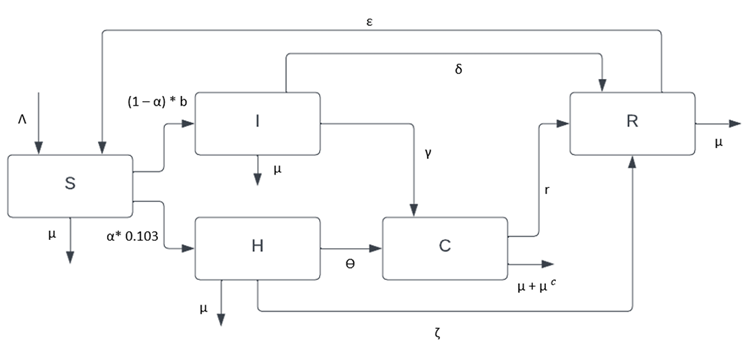

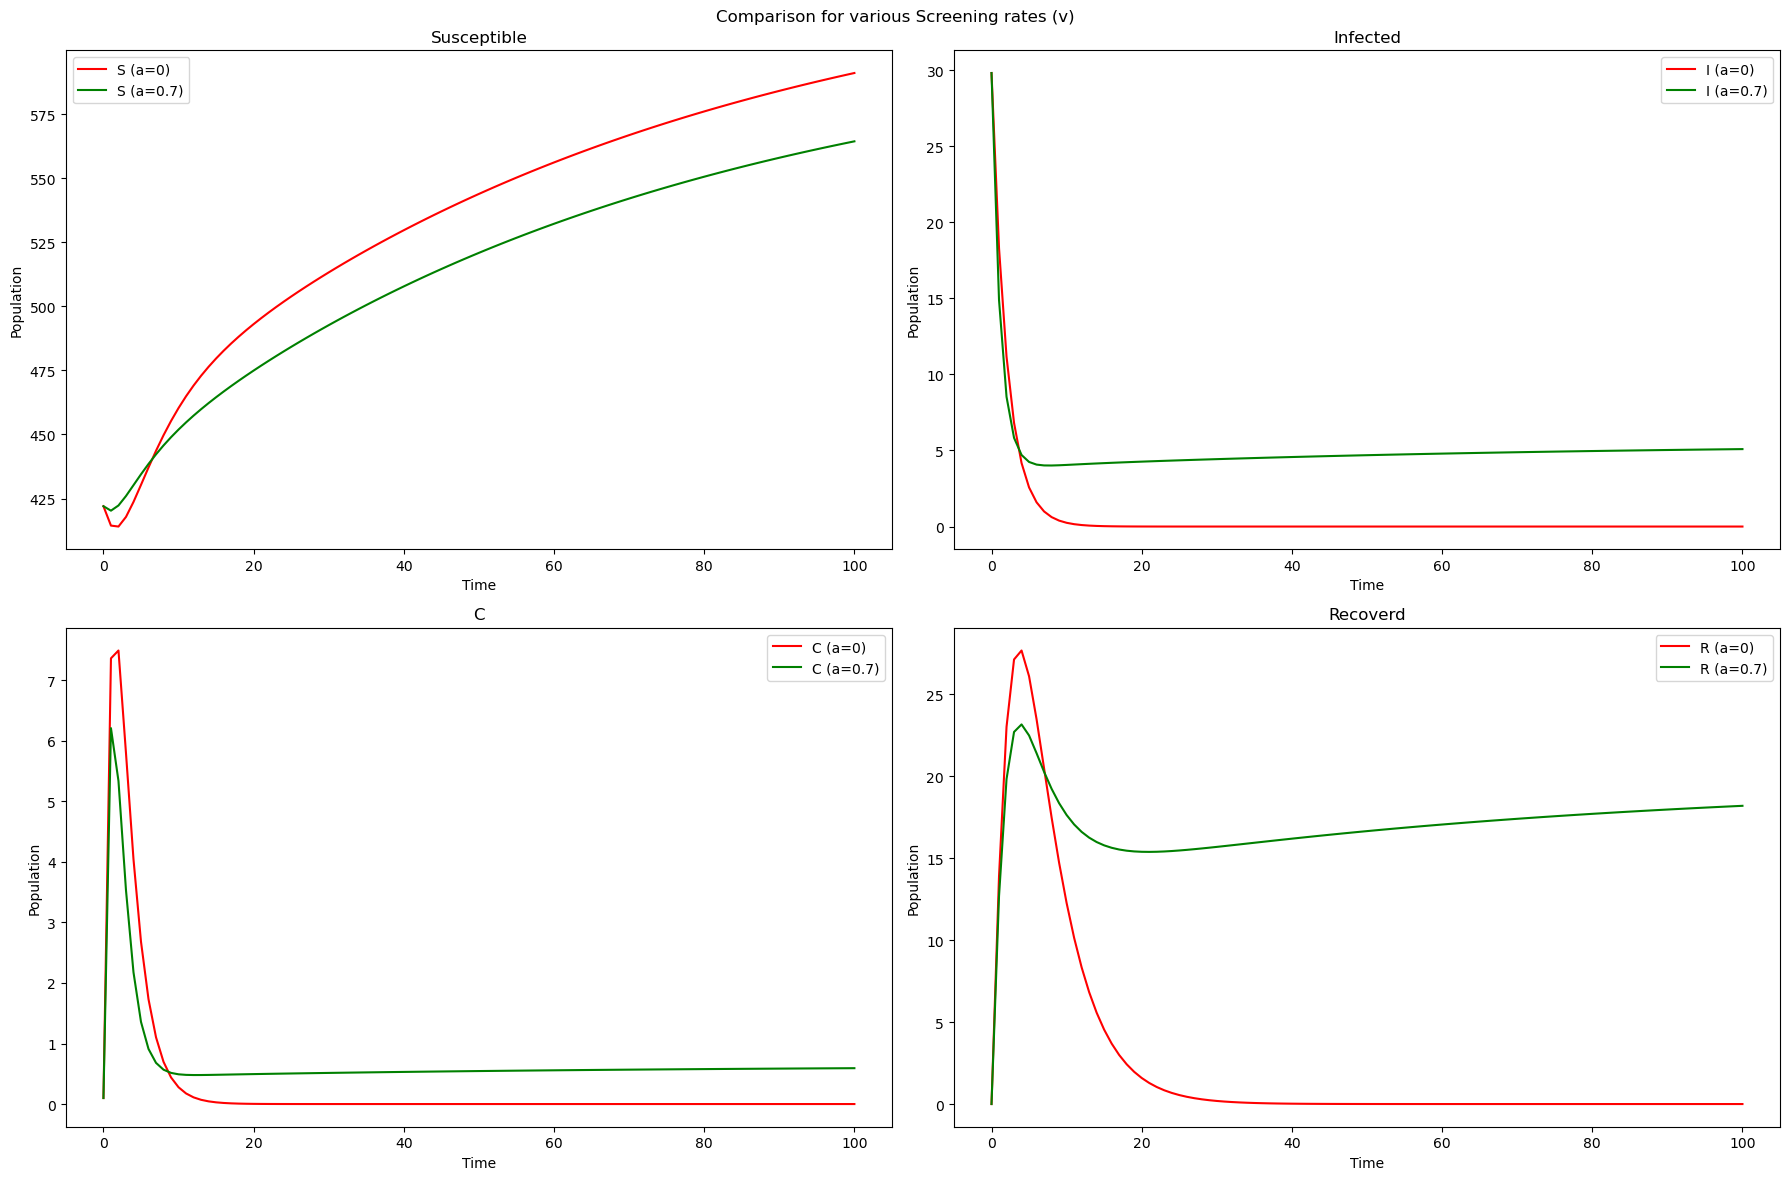

In [15]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from ipywidgets import interactive, FloatSlider
Up = [9.01623, 0.7, 0.556, 0.5, 0.014156, 0.108696, 0.485844, 0.2, 0.77, 0.104, 0.68  ]

# Parameters
Lambda = Up[0]
a =Up[1]
b =Up[2]
delt =Up[3]
u =Up[4]
u3 =Up[5]
gam =Up[6]
e =Up[7]
r =Up[8]
the =Up[9]
tel =Up[10]

# Initial Conditions
x0 = [422.00000,29.820000, 0, 0.099100, 0]

t = np.linspace(0, 100, 101)

def model(x, t, a):
    S, I, H, C, R = x
    no = S + I + H + C + R
    dSdt = Lambda + e * R - a*0.0103*S - (1-a)*b*S*I/no- u*S
    dIdt = (1-a)*b*S*I/no  - (delt + u + gam) * I
    dHdt =a*0.0103*S - (the + tel + u) * H
    dCdt = the*H + gam*I - (r + u + u3)*C
    dRdt = delt * I + tel * H + r * C - (e + u) * R
    return [dSdt, dIdt, dHdt, dCdt, dRdt]

def plot_simulation(a):
    # Solve ODEs
    sol0 = odeint(model, x0, t, args=(0,))
    sol07 = odeint(model, x0, t, args=(0.7,))

    # Calculate the combined compartments

    I_new0 = sol0[:, 1] + sol0[:, 2]  # 'I' + 'H'
    I_new07 = sol07[:, 1] + sol07[:, 2]

    # Plot results for 'S', 'I', 'C', and 'R'
    plt.figure(figsize=(18, 12))

    plt.subplot(2, 2, 1)
    plt.plot(t, sol0[:, 0],label='S (a=0)', color='red')
    plt.plot(t, sol07[:, 0],label='S (a=0.7)', color='green')
    plt.title('Susceptible')
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.legend()


    plt.subplot(2, 2, 2)
    plt.plot(t, I_new0,label='I (a=0)', color='red')
    plt.plot(t, I_new07,label='I (a=0.7)', color='green')
    plt.title('Infected')
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.legend()

    plt.subplot(2, 2, 3)
    plt.plot(t, sol0[:, 3],label='C (a=0)', color='red')
    plt.plot(t, sol07[:, 3],label='C (a=0.7)', color='green')
    plt.title('C')
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.legend()

    plt.subplot(2, 2, 4)
    plt.plot(t, sol0[:, 4],label='R (a=0)', color='red')
    plt.plot(t, sol07[:, 4],label='R (a=0.7)', color='green')
    plt.title('Recoverd')
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.legend()

    plt.suptitle('Comparison for various Screening rates (v)')
    plt.tight_layout()
    plt.show()

plot_simulation(0)

## Vaccination Model

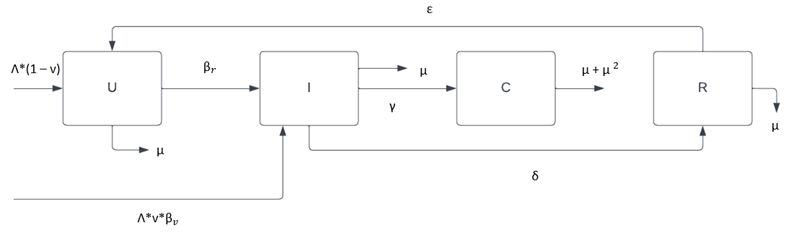

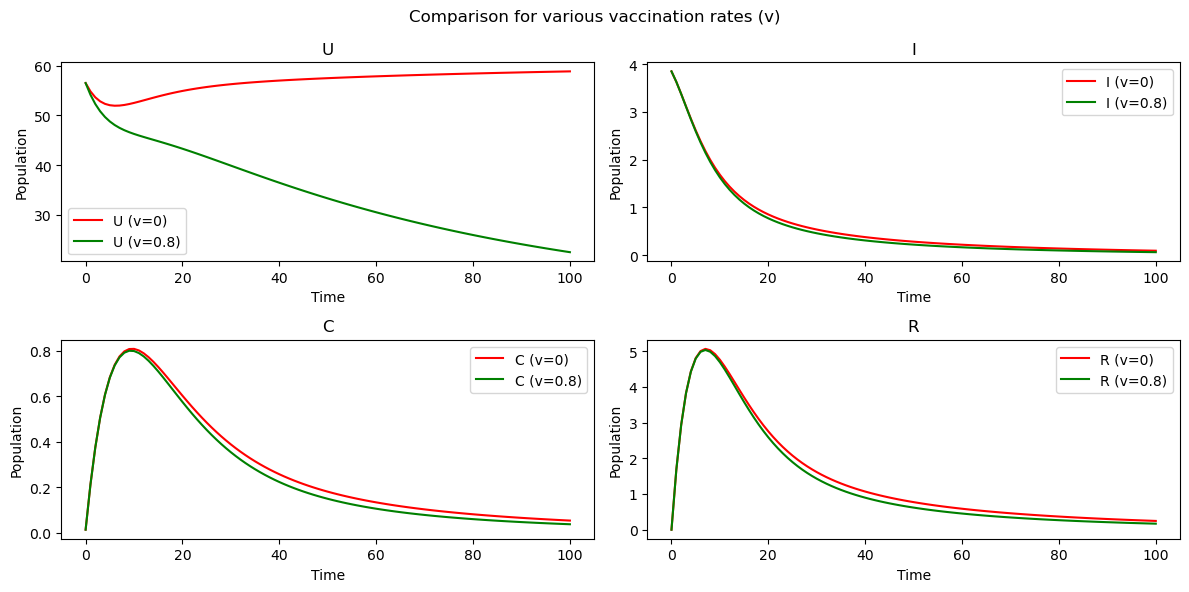

In [16]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

Up = [0.8554, 0.80, 0.556,0.556, 0.5, 0.014156, 0.108696, 0.057, 0.2 ]

# Parameters (fixed values)
Lambda = Up[0]
b = Up[2]
bv = Up[3]
delt = Up[4]
u = Up[5]
u3 = Up[6]
gam = Up[7]
e = Up[8]

# Initial Conditions

x0 = [56.47,3.8465, 0.0128, 0]
t = np.linspace(0, 100, 101)

def model(x, t, v):
  U, I, C, R = x
  no = I + C + R + U
  dUdt = (1-v)*Lambda - (u)*U - b*U*I/no + e * R
  dIdt = b*U*I/no + 0.05*bv*v*Lambda*I/no - (delt + u + gam) * I
  dCdt = gam*I - ( u + u3)*C
  dRdt = delt * I - (u + e)*R
  return [dUdt, dIdt, dCdt, dRdt]

def plot_simulation(v):
  # Solve ODEs with v = 0 and v = 0.8
  sol_v0 = odeint(model, x0, t, args=(0,))
  sol_v08 = odeint(model, x0, t, args=(0.8,))

  # Plot results for 'U', 'I', 'C' and 'R'
  plt.figure(figsize=(12, 6))

  plt.subplot(2, 2, 1)
  # Plot U for v = 0 (red) and v = 0.8 (green)
  plt.plot(t, sol_v0[:, 0], label='U (v=0)', color='red')
  plt.plot(t, sol_v08[:, 0], label='U (v=0.8)', color='green')
  plt.title('U')
  plt.xlabel('Time')
  plt.ylabel('Population')
  plt.legend()

  plt.subplot(2, 2, 2)
  # Plot I for v = 0 (red) and v = 0.8 (green)
  plt.plot(t, sol_v0[:,1], label='I (v=0)', color='red')
  plt.plot(t, sol_v08[:,1], label='I (v=0.8)', color='green')
  plt.title('I')
  plt.xlabel('Time')
  plt.ylabel('Population')
  plt.legend()

  plt.subplot(2, 2, 3)
  # Plot C for v = 0 (red) and v = 0.8 (green)
  plt.plot(t, sol_v0[:, 2], label='C (v=0)', color='red')
  plt.plot(t, sol_v08[:, 2], label='C (v=0.8)', color='green')
  plt.title('C')
  plt.xlabel('Time')
  plt.ylabel('Population')
  plt.legend()

  plt.subplot(2, 2, 4)
  # Plot R for v = 0 (red) and v = 0.8 (green)
  plt.plot(t, sol_v0[:,3], label='R (v=0)', color='red')
  plt.plot(t, sol_v08[:,3], label='R (v=0.8)', color='green')
  plt.title('R')
  plt.xlabel('Time')
  plt.ylabel('Population')
  plt.legend()

  plt.suptitle('Comparison for various vaccination rates (v)')
  plt.tight_layout()
  plt.show()

# Call the function for both v values
plot_simulation(0)